In [425]:
import nltk

## Part I: Importing Text of Kafka's _Metamorphosis_

Techniques used from Chapter 3: Processing Raw Text from _Natural Language Processing with Python_ by Steven Bird, Ewan Klein, and Edward Loper. This ebook is available at <https://www.nltk.org/book/>.

In [426]:
# Load text from local file
f = open("Metamorphosis.txt")
raw = f.read()

In [427]:
print(raw.find("One"))
print(raw.find("*** END"))

1007
119423


In [428]:
corrected = raw[1007:119418].replace("—", " — ")
tokens = nltk.word_tokenize(corrected)
len(tokens)

25283

In [429]:
text = nltk.Text(tokens)
text

<Text: One morning , when Gregor Samsa woke from...>

## Part II: The Basics

From Chapter 1: Language Processing and Python of _Natural Language Processing with Python_.

In [430]:
# Search text to find matches for a word
text.concordance("office")

Displaying 6 of 6 matches:
not avoid his boss ’ s anger as the office assistant would have been there to 
t being there a long time ago . The office assistant was the boss ’ s man , sp
ed to wait , sir ; I ’ ll be in the office soon after you , and please be so g
 So where are you going , in to the office ? Yes ? Will you report everything 
on ’ t take sides against me at the office . I know that nobody likes the trav
almost the whole year away from the office , so that we can very easily fall v


In [431]:
# Find words that are mentioned in similar contexts as "office"
text.similar("office")

floor time headboard door evenings excitement lock ground contrary


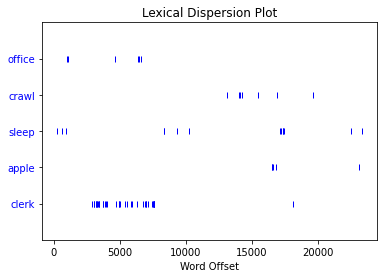

In [432]:
text.dispersion_plot(["office", "crawl", "sleep", "apple", "clerk"])

In [433]:
text.generate()

Building ngram index...


not a lot , but stay of her clothes after she had . , said Gregor
slowly pushed his head in front of her mother quite worried , she was
prevented from telling them all about it . every evening and morning
and at first , but now she could have guessed what his sister who had
become a little while . and lodged in Gregor ’ s father , her life up
till then had been drawn back in among people , and broke ; a splinter
cut Gregor ’ s glance and almost without noticing it . to


'not a lot , but stay of her clothes after she had . , said Gregor\nslowly pushed his head in front of her mother quite worried , she was\nprevented from telling them all about it . every evening and morning\nand at first , but now she could have guessed what his sister who had\nbecome a little while . and lodged in Gregor ’ s father , her life up\ntill then had been drawn back in among people , and broke ; a splinter\ncut Gregor ’ s glance and almost without noticing it . to'

In [434]:
# Number of unique words as percentage of total words
len(set(text)) / len(text)

0.10837321520389194

In [435]:
# Number of times the word "crawl" appears
text.count("crawl")

7

In [436]:
fdist = nltk.FreqDist(text)
fdist.most_common(25)

[(',', 1293),
 ('the', 1097),
 ('to', 753),
 ('.', 682),
 ('and', 612),
 ('his', 524),
 ('he', 505),
 ('of', 429),
 ('was', 406),
 ('had', 350),
 ('in', 339),
 ('’', 331),
 ('it', 330),
 ('that', 330),
 ('Gregor', 298),
 ('a', 283),
 ('as', 233),
 ('with', 194),
 ('s', 194),
 ('him', 188),
 ('would', 184),
 ('her', 183),
 ('not', 177),
 ('she', 175),
 (';', 170)]

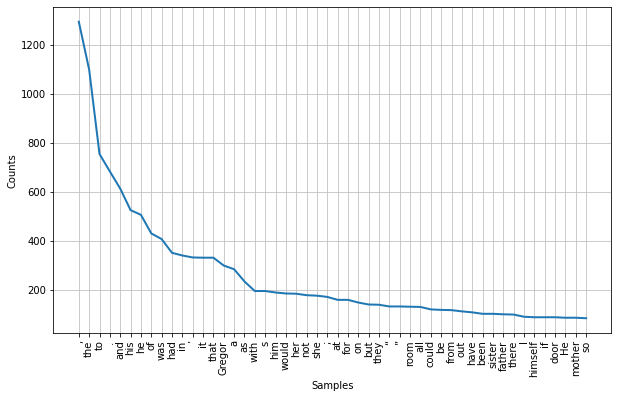

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [437]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

fdist.plot(50)

In [438]:
long_words = [w for w in set(text) if len(w) > 15]
long_words

['unselfconsciously',
 'incomprehensible',
 'furniture-rattling',
 'Charlottenstrasse']

In [439]:
sorted(w for w in set(text) if len(w) > 7 and fdist[w] > 7)

['although',
 'anything',
 'attention',
 'business',
 'carefully',
 'certainly',
 'charwoman',
 'completely',
 'condition',
 'especially',
 'everyone',
 'everything',
 'finished',
 'furniture',
 'gentlemen',
 'happened',
 'immediately',
 'position',
 'possible',
 'probably',
 'realised',
 'remained',
 'slightly',
 'something',
 'straight',
 'suddenly',
 'themselves',
 'together',
 'understand']

In [440]:
text.collocations()

chief clerk; Mr. Samsa; three gentlemen; living room; Mrs. Samsa;
little legs; even though; straight away; entrance hall; two women;
five years; lower part; could see; earn money; get rid; next room;
several times; would often; well aware; sister would


## Part III: Text Corpora and Lexical Resources

From Chapter 2: Accessing Text Corpora and Lexical Resources of _Natural Language Processing with Python_. 

### Gutenberg Corpus

In [441]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [442]:
paradise_lost = nltk.corpus.gutenberg.words('milton-paradise.txt')
len(paradise_lost)

96825

### Brown Corpus

In [443]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [444]:
belles_lettres_text = nltk.corpus.brown.words(categories="learned")
fdist = nltk.FreqDist(w.lower() for w in belles_lettres_text)
modals = ["can", "could", "may", "might", "must", "will"]
for m in modals: 
    print(m + ":", fdist[m])
    
print()
wh_words = ["what", "when", "where", "who", "why"]
for wh in wh_words:
    print(wh + ":", fdist[wh])

can: 367
could: 159
may: 336
might: 128
must: 203
will: 340

what: 177
when: 312
where: 126
who: 214
why: 24


In [445]:
cfd = nltk.ConditionalFreqDist(
    (genre, word) 
    for genre in nltk.corpus.brown.categories() 
    for word in nltk.corpus.brown.words(categories=genre))
genres = nltk.corpus.brown.categories()
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
      adventure    46   151     5    58    27    50 
 belles_lettres   246   213   207   113   170   236 
      editorial   121    56    74    39    53   233 
        fiction    37   166     8    44    55    52 
     government   117    38   153    13   102   244 
        hobbies   268    58   131    22    83   264 
          humor    16    30     8     8     9    13 
        learned   365   159   324   128   202   340 
           lore   170   141   165    49    96   175 
        mystery    42   141    13    57    30    20 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        reviews    45    40    45    26    19    58 
        romance    74   193    11    51    45    43 
science_fiction    16    49     4    12     8    16 


In [446]:
cfd.tabulate(conditions=genres, samples=wh_words)

                 what  when where   who   why 
      adventure   110   126    53    91    13 
 belles_lettres   244   252   107   452    36 
      editorial    84   103    40   172    10 
        fiction   128   133    76   103    18 
     government    43    56    46    74     6 
        hobbies    78   119    72   103    10 
          humor    36    52    15    48     9 
        learned   141   227   118   212    20 
           lore   130   182    97   259    25 
        mystery   109   114    59    80    25 
           news    76   128    58   268     9 
       religion    64    53    20   100    14 
        reviews    44    54    25   128     9 
        romance   121   126    54    89    34 
science_fiction    27    21    10    13     4 


In [447]:
cfd.tabulate(conditions=["belles_lettres","religion"], samples=["what", "who"])

               what  who 
belles_lettres  244  452 
      religion   64  100 


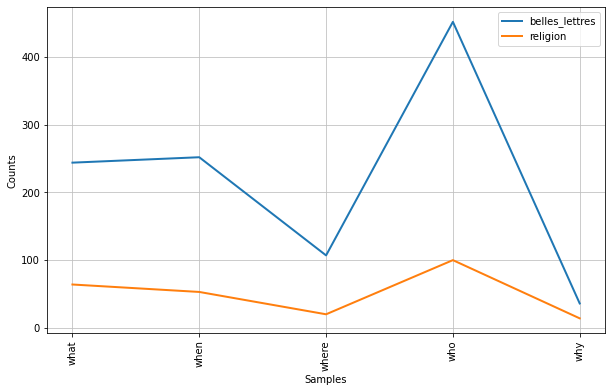

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [448]:
plt.figure(figsize=(10,6))
cfd.plot(samples=wh_words, conditions=["belles_lettres", "religion"])

### Genesis Corpus

In [449]:
def lexical_diversity(text_data):
    return len(set(text_data)) / len(text_data)

In [450]:
from nltk.corpus import genesis
kjv = genesis.words("english-kjv.txt")
lexical_diversity(kjv)

0.06230453042623537

In [451]:
def find_unusual_words(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english = set(w.lower() for w in nltk.corpus.words.words())
    return sorted(text_vocab - english)

In [452]:
find_unusual_words(genesis.words("english-kjv.txt"))

['abated',
 'abelmizraim',
 'abidah',
 'abimael',
 'abimelech',
 'abr',
 'abrah',
 'accad',
 'achbor',
 'adah',
 'adbeel',
 'admah',
 'aholibamah',
 'ahuzzath',
 'aileth',
 'ajah',
 'allonbachuth',
 'almodad',
 'amal',
 'amalek',
 'amalekites',
 'ammon',
 'amorites',
 'amraphel',
 'anah',
 'anamim',
 'aner',
 'angels',
 'anointedst',
 'anoth',
 'answered',
 'appe',
 'appeared',
 'appointed',
 'aprons',
 'aram',
 'aran',
 'ararat',
 'arbah',
 'archers',
 'ard',
 'areli',
 'arioch',
 'arodi',
 'arphaxad',
 'arrayed',
 'arvadite',
 'asenath',
 'ashbel',
 'ashkenaz',
 'ashteroth',
 'asked',
 'asketh',
 'asses',
 'asshur',
 'asshurim',
 'asswaged',
 'assyr',
 'assyria',
 'atad',
 'attained',
 'avenged',
 'avith',
 'awaked',
 'baalhanan',
 'badest',
 'badne',
 'bak',
 'bakemeats',
 'bakers',
 'bands',
 'barr',
 'bashemath',
 'baskets',
 'beari',
 'beasts',
 'became',
 'beeri',
 'beerlahairoi',
 'beersheba',
 'befell',
 'began',
 'begettest',
 'beguiled',
 'believed',
 'benam',
 'beor',
 'ber

In [453]:
def non_stopwords(text):
    text_vocab = set(w.lower() for w in text if w.isalpha())
    english_stopwords = set(w.lower() for w in nltk.corpus.stopwords.words("english"))
    return sorted(text_vocab - english_stopwords)

In [454]:
non_stopwords(genesis.words("english-kjv.txt"))

['abated',
 'abel',
 'abelmizraim',
 'abidah',
 'abide',
 'abimael',
 'abimelech',
 'able',
 'abode',
 'abomination',
 'abr',
 'abrah',
 'abraham',
 'abram',
 'abroad',
 'absent',
 'abundantly',
 'accad',
 'accept',
 'accepted',
 'according',
 'achbor',
 'acknowledged',
 'activity',
 'adah',
 'adam',
 'adbeel',
 'add',
 'adder',
 'admah',
 'adullamite',
 'afar',
 'afflict',
 'affliction',
 'afraid',
 'afterward',
 'afterwards',
 'aga',
 'age',
 'aholibamah',
 'ahuzzath',
 'aileth',
 'air',
 'ajah',
 'akan',
 'al',
 'alive',
 'allonbachuth',
 'almighty',
 'almodad',
 'almon',
 'alo',
 'alone',
 'aloud',
 'also',
 'altar',
 'altogether',
 'alvah',
 'alvan',
 'always',
 'amal',
 'amalek',
 'amalekites',
 'ammon',
 'among',
 'amongst',
 'amorite',
 'amorites',
 'amraphel',
 'anah',
 'anamim',
 'aner',
 'angel',
 'angels',
 'anger',
 'angry',
 'anguish',
 'anointedst',
 'anoth',
 'another',
 'answer',
 'answered',
 'anything',
 'appe',
 'appear',
 'appeared',
 'appease',
 'appoint',
 'appoi

### WordNet

In [455]:
from nltk.corpus import wordnet as wn
car = wn.synsets("motorcar")[0]

In [456]:
car.lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [457]:
car.definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [458]:
car.examples()

['he needs a car to get to work']

In [459]:
wn.synsets("bicycle")[0].lemmas()

[Lemma('bicycle.n.01.bicycle'),
 Lemma('bicycle.n.01.bike'),
 Lemma('bicycle.n.01.wheel'),
 Lemma('bicycle.n.01.cycle')]

In [460]:
wn.lemma("bicycle.n.01.cycle").synset()

Synset('bicycle.n.01')

In [461]:
for synset in wn.synsets("car")[:4]:
    print(synset.lemma_names())

['car', 'auto', 'automobile', 'machine', 'motorcar']
['car', 'railcar', 'railway_car', 'railroad_car']
['car', 'gondola']
['car', 'elevator_car']


In [462]:
motorcar = wn.synset("car.n.01")
types_of_motorcar = motorcar.hyponyms()
sorted(lemma.name() for synset in types_of_motorcar for lemma in synset.lemmas())

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

In [463]:
set(synset.name() for path in motorcar.hypernym_paths() for synset in path)

{'artifact.n.01',
 'car.n.01',
 'container.n.01',
 'conveyance.n.03',
 'entity.n.01',
 'instrumentality.n.03',
 'motor_vehicle.n.01',
 'object.n.01',
 'physical_entity.n.01',
 'self-propelled_vehicle.n.01',
 'vehicle.n.01',
 'wheeled_vehicle.n.01',
 'whole.n.02'}

In [464]:
motorcar.root_hypernyms()

[Synset('entity.n.01')]

In [465]:
entity = wn.synset("entity.n.01")
entity.hyponyms()[0].hyponyms()[0].hyponyms()[0].root_hypernyms()

[Synset('entity.n.01')]

## Part IV: Processing Raw Text

From Chapter 3: Processing Raw Text of _Natural Language Processing with Python_.

### Working with Unicode

In [466]:
import unicodedata

In [467]:
path = nltk.data.find("corpora/unicode_samples/polish-lat2.txt")
f = open(path, encoding="latin2")
lines = f.readlines()

In [468]:
nacute = "\u0144"
nacute.encode('utf8')

b'\xc5\x84'

In [469]:
for c in lines[2]:
    if ord(c) > 127:
        print("{} U+{:04x} {}".format(c.encode('utf8'), ord(c), unicodedata.name(c)))

b'\xc3\xb3' U+00f3 LATIN SMALL LETTER O WITH ACUTE
b'\xc5\x9b' U+015b LATIN SMALL LETTER S WITH ACUTE
b'\xc5\x9a' U+015a LATIN CAPITAL LETTER S WITH ACUTE
b'\xc4\x85' U+0105 LATIN SMALL LETTER A WITH OGONEK
b'\xc5\x82' U+0142 LATIN SMALL LETTER L WITH STROKE


### Regular Expressions

In [470]:
import re
words = [w for w in nltk.corpus.words.words("en") if w.islower()]

In [471]:
[w for w in words if re.search("ed$", w)]

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

In [472]:
len([w for w in words if re.search("^[lmn][opq][rst]", w) and len(w) > 3])

851

In [473]:
len([w for w in words if re.search("ed|ing|es", w) and len(w) < 5])

138

### Normalizing Text

In [474]:
raw_short = """One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections."""
tokens = nltk.word_tokenize(raw_short)

In [475]:
porter = nltk.PorterStemmer()
set([porter.stem(t) for t in tokens])

{',',
 '.',
 'a',
 'and',
 'arch',
 'armour-lik',
 'back',
 'bed',
 'belli',
 'brown',
 'by',
 'could',
 'divid',
 'dome',
 'dream',
 'found',
 'from',
 'gregor',
 'he',
 'head',
 'hi',
 'himself',
 'horribl',
 'if',
 'in',
 'into',
 'lay',
 'lift',
 'littl',
 'morn',
 'on',
 'one',
 'samsa',
 'section',
 'see',
 'slightli',
 'stiff',
 'transform',
 'troubl',
 'vermin',
 'when',
 'woke'}

In [476]:
wnl = nltk.WordNetLemmatizer()
set([wnl.lemmatize(t) for t in tokens])

{',',
 '.',
 'Gregor',
 'He',
 'One',
 'Samsa',
 'a',
 'and',
 'arch',
 'armour-like',
 'back',
 'bed',
 'belly',
 'brown',
 'by',
 'could',
 'divided',
 'domed',
 'dream',
 'found',
 'from',
 'he',
 'head',
 'himself',
 'his',
 'horrible',
 'if',
 'in',
 'into',
 'lay',
 'lifted',
 'little',
 'morning',
 'on',
 'section',
 'see',
 'slightly',
 'stiff',
 'transformed',
 'troubled',
 'vermin',
 'when',
 'woke'}

In [477]:
split_text = re.findall(r'\w+', raw_short)
split_text

['One',
 'morning',
 'when',
 'Gregor',
 'Samsa',
 'woke',
 'from',
 'troubled',
 'dreams',
 'he',
 'found',
 'himself',
 'transformed',
 'in',
 'his',
 'bed',
 'into',
 'a',
 'horrible',
 'vermin',
 'He',
 'lay',
 'on',
 'his',
 'armour',
 'like',
 'back',
 'and',
 'if',
 'he',
 'lifted',
 'his',
 'head',
 'a',
 'little',
 'he',
 'could',
 'see',
 'his',
 'brown',
 'belly',
 'slightly',
 'domed',
 'and',
 'divided',
 'by',
 'arches',
 'into',
 'stiff',
 'sections']

In [478]:
sents = nltk.sent_tokenize(raw_short)
sents

['One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.',
 'He lay on his armour-like back, and if he lifted his head a little he could see his brown belly, slightly domed and divided by arches into stiff sections.']

## Categorizing and Tagging Words

From Chapter 5: Categorizing and Tagging Words of _Natural Language Processing with Python_. 

In [479]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories="belles_lettres")
brown_sents = brown.sents(categories="belles_lettres")

In [480]:
nltk.pos_tag(text[:50])

[('One', 'CD'),
 ('morning', 'NN'),
 (',', ','),
 ('when', 'WRB'),
 ('Gregor', 'NNP'),
 ('Samsa', 'NNP'),
 ('woke', 'VBD'),
 ('from', 'IN'),
 ('troubled', 'JJ'),
 ('dreams', 'NNS'),
 (',', ','),
 ('he', 'PRP'),
 ('found', 'VBD'),
 ('himself', 'PRP'),
 ('transformed', 'VBN'),
 ('in', 'IN'),
 ('his', 'PRP$'),
 ('bed', 'NN'),
 ('into', 'IN'),
 ('a', 'DT'),
 ('horrible', 'JJ'),
 ('vermin', 'NN'),
 ('.', '.'),
 ('He', 'PRP'),
 ('lay', 'VBD'),
 ('on', 'IN'),
 ('his', 'PRP$'),
 ('armour-like', 'JJ'),
 ('back', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('if', 'IN'),
 ('he', 'PRP'),
 ('lifted', 'VBD'),
 ('his', 'PRP$'),
 ('head', 'NN'),
 ('a', 'DT'),
 ('little', 'JJ'),
 ('he', 'PRP'),
 ('could', 'MD'),
 ('see', 'VB'),
 ('his', 'PRP$'),
 ('brown', 'JJ'),
 ('belly', 'RB'),
 (',', ','),
 ('slightly', 'RB'),
 ('domed', 'VBN'),
 ('and', 'CC'),
 ('divided', 'VBN'),
 ('by', 'IN')]

In [481]:
sorted(nltk.corpus.cess_cat.tagged_words()[:100])

[('*0*', 'sn.e-SUJ'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 (',', 'Fc'),
 ('-Fpa-', 'Fpa'),
 ('-Fpt-', 'Fpt'),
 ('-los', 'pp3cp000'),
 ('-se', 'p0300000'),
 ('.', 'Fp'),
 ('3,6', 'Z'),
 ('Albert_Bramón', 'np0000p'),
 ('Col·legi_de_Veterinaris_de_Girona', 'np0000o'),
 ('El', 'da0ms0'),
 ('Generalitat', 'np0000o'),
 ('Intra-ACN', 'np0000o'),
 ('Josefina_J.', 'np0000p'),
 ('La', 'da0fs0'),
 ('Mateu_B.', 'np0000p'),
 ('Pere_C.', 'np0000p'),
 ('TS', 'np0000o'),
 ('Tribunal_Suprem', 'np0000o'),
 ('a', 'sps00'),
 ('a', 'sps00'),
 ('a', 'sps00'),
 ('accés', 'ncms000'),
 ('actuaven', 'vmii3p0'),
 ('amb', 'sps00'),
 ('anys', 'ncmp000'),
 ('beneficiat', 'vmp00sm'),
 ('com_a', 'sps00'),
 ('condemna', 'ncfs000'),
 ('confirmat', 'vmp00sm'),
 ('càrniques', 'aq0fp0'),
 ('càrrecs', 'ncmp000'),
 ("d'", 'sps00'),
 ('de', 'sps00'),
 ('de', 'sps00'),
 ('de', 'sps00'),
 ('de', 'sps00'),
 ('del', 'spcms'),
 ('dels', 'spcmp'),
 ('dels'

In [482]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

In [483]:
re_tagger = nltk.RegexpTagger(patterns)
re_tagger.tag(brown_sents[5])

[('The', 'NN'),
 ('nature', 'NN'),
 ('of', 'NN'),
 ('the', 'NN'),
 ('opposition', 'NN'),
 ('between', 'NN'),
 ('liberals', 'NNS'),
 ('and', 'NN'),
 ('Bourbons', 'NNS'),
 ('is', 'NNS'),
 ('too', 'NN'),
 ('little', 'NN'),
 ('understood', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('North', 'NN'),
 ('.', 'NN')]

In [484]:
re_tagger.accuracy(brown_tagged_sents)

0.18268475296945047

In [485]:
fd = nltk.FreqDist(brown.words(categories="belles_lettres"))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories="belles_lettres"))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [486]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags, backoff=nltk.DefaultTagger('NN'))
baseline_tagger.accuracy(brown_tagged_sents)

0.6206844756666821

In [487]:
sents = brown.tagged_sents(categories="news")
size = int(len(sents) * 0.75)
train_sents = sents[:size]
test_sents = sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.accuracy(test_sents)

0.8064236764816628